# Outlier detection in Covid-19 data of cantons

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# to use different styles, make sure to reload the default to always get clean results
# plt.style.available
def use_style(style):
    plt.style.use('default')
    plt.style.use(style)

## Read the file

In [2]:
# load canton file from covid_19 repo
df = pd.read_csv('https://raw.githubusercontent.com/openZH/covid_19/master/fallzahlen_kanton_total_csv_v2/COVID19_Fallzahlen_Kanton_ZH_total.csv', parse_dates=[0])
df

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source
0,2020-02-27,14:30,ZH,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,https://gd.zh.ch/internet/gesundheitsdirektion...
1,2020-02-28,14:30,ZH,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,https://gd.zh.ch/internet/gesundheitsdirektion...
2,2020-02-29,14:30,ZH,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,https://gd.zh.ch/internet/gesundheitsdirektion...
3,2020-03-01,14:30,ZH,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,https://gd.zh.ch/internet/gesundheitsdirektion...
4,2020-03-02,14:30,ZH,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,https://gd.zh.ch/internet/gesundheitsdirektion...
...,...,...,...,...,...,...,...,...,...,...,...,...
70,2020-05-07,14:30,ZH,NaN,3535,NaN,50.0,NaN,7.0,NaN,125.0,https://gd.zh.ch/internet/gesundheitsdirektion...
71,2020-05-08,14:30,ZH,NaN,3545,NaN,47.0,NaN,5.0,NaN,125.0,https://gd.zh.ch/internet/gesundheitsdirektion...
72,2020-05-09,14:30,ZH,NaN,3550,NaN,37.0,NaN,5.0,NaN,126.0,https://gd.zh.ch/internet/gesundheitsdirektion...
73,2020-05-10,14:30,ZH,NaN,3553,NaN,40.0,NaN,5.0,NaN,126.0,https://gd.zh.ch/internet/gesundheitsdirektion...


## Plot cumulative confirmed cases

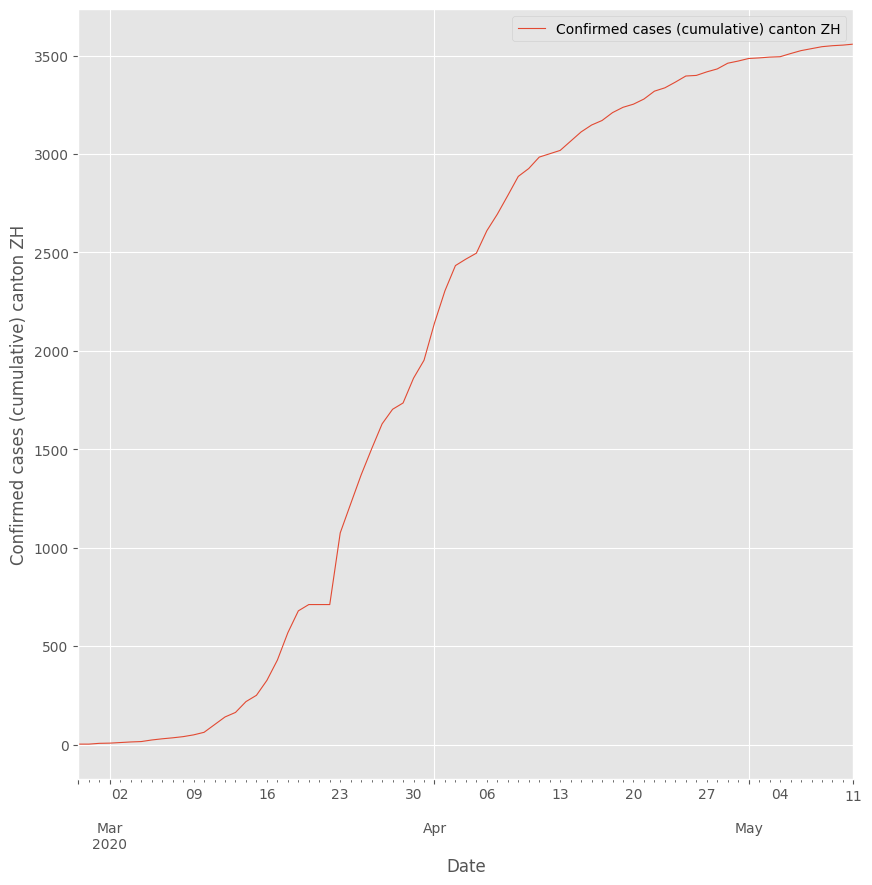

In [3]:
use_style('ggplot')
fig, ax = plt.subplots(figsize=(10,10))
df.plot(kind='line', y='ncumul_conf', x="date", label="Confirmed cases (cumulative) canton ZH", ax=ax, linewidth=0.8)
ax.set_ylabel('Confirmed cases (cumulative) canton ZH')
ax.set_xlabel('Date')
plt.show()

## Plot current confirmed cases

In [11]:
# create dataset for daily new cases
df_zh_conf = df[['date', 'ncumul_conf']].reset_index(drop=True)
df_zh_conf['current_conf'] = df['ncumul_conf'] - df['ncumul_conf'].shift(1)
df_zh_conf = df_zh_conf.tail(30).reset_index(drop=True)
df_zh_conf

,date,ncumul_conf,current_conf
0,2020-04-12,3001,17.0
1,2020-04-13,3018,17.0
2,2020-04-14,3065,47.0
3,2020-04-15,3112,47.0
4,2020-04-16,3147,35.0
5,2020-04-17,3170,23.0
6,2020-04-18,3210,40.0
7,2020-04-19,3237,27.0
8,2020-04-20,3253,16.0
9,2020-04-21,3279,26.0


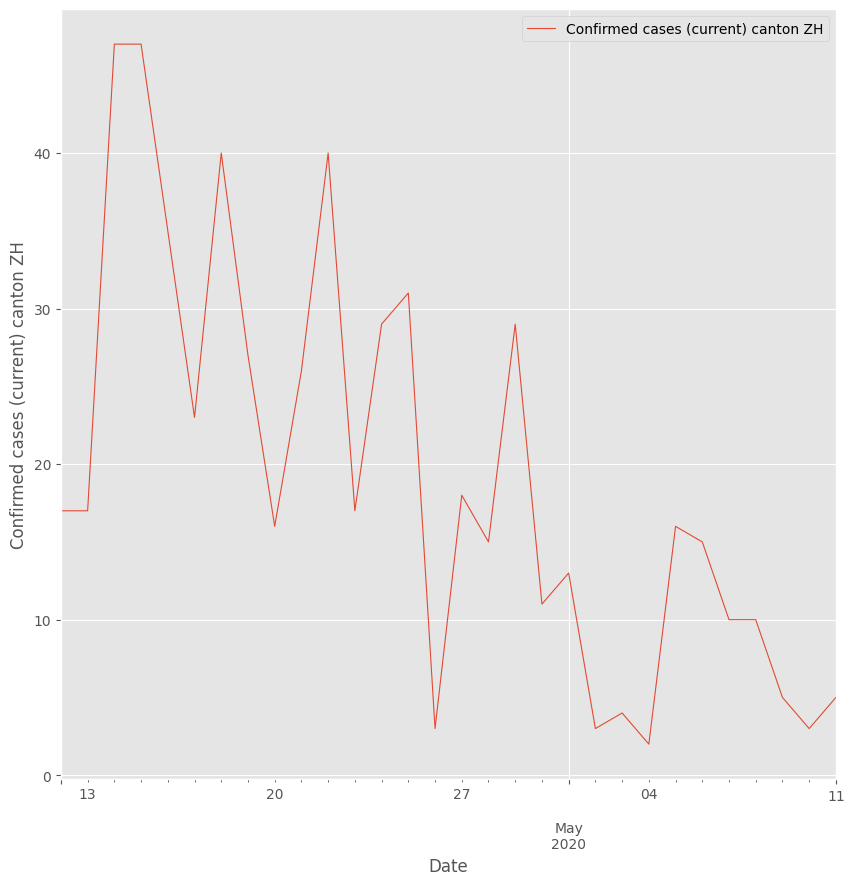

In [12]:
# display daily new cases dataset
use_style('ggplot')
fig, ax = plt.subplots(figsize=(10,10))
df_zh_conf.plot(kind='line', y='current_conf', x="date", label="Confirmed cases (current) canton ZH", ax=ax, linewidth=0.8)
ax.set_ylabel('Confirmed cases (current) canton ZH')
ax.set_xlabel('Date')
plt.show()

## Find outliers

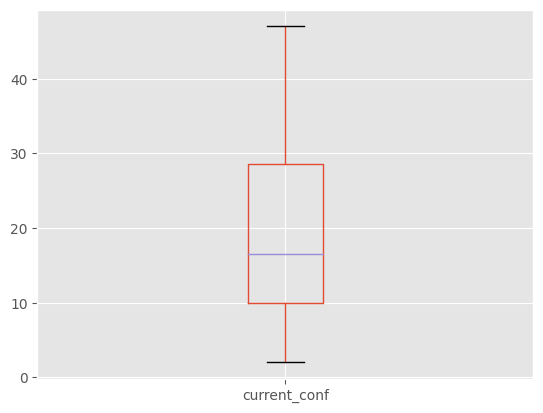

In [13]:
# boxplot of values
df_zh_conf.boxplot(column='current_conf')

In [14]:
# caculate iqr for confirmed cases
q1 = df_zh_conf['current_conf'].quantile(0.25)
q3 = df_zh_conf['current_conf'].quantile(0.75)
iqr = q3 - q1
iqr

18.5

In [15]:
factor = 1.5
iqr * factor

27.75

In [16]:
# use 1.5 iqr to detect outliers
outliers = df_zh_conf.query('(current_conf < (@q1 - @factor * @iqr)) or  (current_conf > (@q3 + @factor * @iqr))')
outliers

,date,ncumul_conf,current_conf
